In [143]:
from collections import Counter
import spacy
import textacy
from spacy import displacy
import pandas as pd
import numpy as np
from wordfreq import word_frequency
from wordfreq import zipf_frequency
import matplotlib.pyplot as plt
import random

nlp = spacy.load('en_core_web_sm')

In [58]:
train_data = open('C:/Users/mpete/OneDrive/Desktop/Uni/Master_DBI/Period_5/NLP/Assignments/Assignment_1/intro2nlp_assignment1_code/data/preprocessed/train/sentences.txt', encoding='utf-8')
text = train_data.read()
train_data_doc = nlp(text)

<h1><b>PART A</b></h1>

<b>TASK 1</b>

In [ ]:
word_frequencies = Counter()
words_per_sentence = []

for sentence in train_data_doc.sents:
    words = []
    words_single_sentence = 0
    for token in sentence:
        # Let's filter out punctuation and new lines ("/n")
        if (not token.is_punct) and (not token.is_space):
            words.append(token.text)
            words_single_sentence += 1
    words_per_sentence.append(words_single_sentence)
    word_frequencies.update(words)

#print(word_frequencies)
num_tokens = len(train_data_doc)
num_words = sum(word_frequencies.values())
num_types = len(word_frequencies.keys())
avg_num_words_per_sentence = sum(words_per_sentence) / len(words_per_sentence)
avg_word_length = sum(len(word) for word in words) / len(words)

print('Number of Tokens: ' + str(num_tokens))
print('Number of Words: ' + str(num_words))
print('Number of Types: ' + str(num_types))

print('Average number of words per sentence: {number:.{digits}f}'.format(number = avg_num_words_per_sentence, digits = 2))
print('Average word length: {number:.{digits}f}'.format(number = avg_word_length, digits = 2))

<b>TASK 2</b>

In [ ]:
pos_list = []

NN_Noun = []
NNP_Propn = []
IN_Adp = []
DT_Det = []
JJ_Adj = []
NNS_Noun = []
COMMA_Punct = []
PERIOD_Punct = []
SP_Space = []
VBN_Verb = []

for token in train_data_doc:
    #print(token.pos_, token.tag_)
    pos_list.append('{}, {}'.format(token.pos_, token.tag_))
    if ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NN'):
        NN_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PROPN, NNP'):
        NNP_Propn.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADP, IN'):
        IN_Adp.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'DET, DT'):
        DT_Det.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADJ, JJ'):
        JJ_Adj.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NNS'):
        NNS_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, ,'):
        COMMA_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, .'):
        PERIOD_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'SPACE, _SP'):
        SP_Space.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'VERB, VBN'):
        VBN_Verb.append(token.text)


#pos_frequencies = Counter(pos_list)
#print(pos_frequencies)
#print(round(pos_frequencies['NOUN, NN']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['PROPN, NNP']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['ADP, IN']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['DET, DT']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['ADJ, JJ']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['NOUN, NNS']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['PUNCT, ,']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['PUNCT, .']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['SPACE, _SP']/sum(pos_frequencies.values()), 2))
#print(round(pos_frequencies['VERB, VBN']/sum(pos_frequencies.values()), 2))


print(Counter(NN_Noun).most_common(3))
print(Counter(NNP_Propn).most_common(3))
print(Counter(IN_Adp).most_common(3))
print(Counter(DT_Det).most_common(3))
print(Counter(JJ_Adj).most_common(3))
print(Counter(NNS_Noun).most_common(3))
print(Counter(COMMA_Punct).most_common(3))
print(Counter(PERIOD_Punct).most_common(3))
print(Counter(SP_Space).most_common(3))
print(Counter(VBN_Verb).most_common(3))

#infrequent tokens
print(Counter(NN_Noun).most_common()[-1])
print(Counter(NNP_Propn).most_common()[-1])
print(Counter(IN_Adp).most_common()[-1])
print(Counter(DT_Det).most_common()[-1])
print(Counter(JJ_Adj).most_common()[-1])
print(Counter(NNS_Noun).most_common()[-1])
print(Counter(COMMA_Punct).most_common()[-1])
print(Counter(PERIOD_Punct).most_common()[-1])
print(Counter(SP_Space).most_common()[-1])
print(Counter(VBN_Verb).most_common()[-1])

<b>TASK 3</b>

In [ ]:
ngrams = list(textacy.extract.basics.ngrams(train_data_doc, 2, filter_stops=True))
ngrams = [str(i) for i in ngrams]
ngrams_frequency = Counter(ngrams)
print(ngrams_frequency.most_common(3))


pos_list = [str(token.pos_) for token in train_data_doc] #nlp() needs string
pos_list_string = nlp(' '.join(pos_list)) #textacy.extract.basics.ngrams() needs nlp()-element
ngrams = list(textacy.extract.basics.ngrams(pos_list_string, 2))    #ATTENTION: textacy.extract.basics.ngrams() produces elements with type of "spacy.tokens.span.Span", not "str" -> Counter doesn't work for "spacy.tokens.span.Span"
ngrams = [str(i) for i in ngrams]
ngrams_frequency = Counter(ngrams)
print(ngrams_frequency.most_common(3))

<b>TASK 4</b>

In [67]:
for token_i in train_data_doc:
    forms = []
    counter = 0
    lemma = token_i.lemma_
    if str(token_i.lemma_) == 'be':
        continue
    for token_j in train_data_doc:
        if str(token_j.lemma_) == str(token_i.lemma_):
            token_j = str(token_j).lower()
            if (token_j not in forms) and (token_j != lemma):
                forms.append(token_j)
                counter += 1
    if counter > 2:
        break

print(lemma)
print(forms)
print(counter)

say
['said', 'saying', 'says']
3


<b>TASK 5</b>

In [68]:
print(len(train_data_doc.ents))
print(len(Counter([ent.label_ for ent in train_data_doc.ents]).keys()))
print(Counter([ent.label_ for ent in train_data_doc.ents]).keys())
#stop_counter = 0
#for sentence in train_data_doc.sents:
#    stop_counter += 1
#    displacy.render(sentence, jupyter=True, style='ent')
#    if stop_counter == 5: break

1627
17
dict_keys(['DATE', 'GPE', 'ORDINAL', 'CARDINAL', 'ORG', 'PERSON', 'LAW', 'QUANTITY', 'NORP', 'TIME', 'EVENT', 'LOC', 'PERCENT', 'MONEY', 'PRODUCT', 'FAC', 'WORK_OF_ART'])


<h1><b>PART B</b></h1>

In [60]:
#wiki_news_train = open('C:/Users/mpete/OneDrive/Desktop/Uni/Master_DBI/Period_5/NLP/Assignments/Assignment_1/intro2nlp_assignment1_code/data/original/english/WikiNews_Train.tsv', encoding='utf-8')
wiki_news_train_df = pd.read_table('C:/Users/mpete/OneDrive/Desktop/Uni/Master_DBI/Period_5/NLP/Assignments/Assignment_1/intro2nlp_assignment1_code/data/original/english/WikiNews_Train.tsv', header = None)
wiki_news_train_df.columns = ['ID', 'sentence', 'start_index', 'end_index', 'target_word', 'nat', 'non-nat', 'nat diff', 'non-nat diff', 'binary', 'prob']

<b>TASK 7</b>

In [61]:
print(Counter(wiki_news_train_df['binary']))
print((wiki_news_train_df['prob'].min()))
print((wiki_news_train_df['prob']).max())
print((wiki_news_train_df['prob']).median())
print((wiki_news_train_df['prob']).mean())
print((wiki_news_train_df['prob']).std())

counter = 0
max_num_of_tokens = 0
for instance in wiki_news_train_df['target_word']:
    instance = nlp(instance)
    tokens_per_instance = [token.text for token in instance]
    if len(tokens_per_instance) > 1:
        counter += 1
    if len(tokens_per_instance) > max_num_of_tokens:
        max_num_of_tokens = len(tokens_per_instance)

print(counter)
print(max_num_of_tokens)

Counter({0: 4530, 1: 3216})
0.0
1.0
0.0
0.08394655305964369
0.16967909326095576
1086
10


<b>TASK 8</b>

In [69]:
length_tokens = []
frequency = []
prob = []
pos = []


#filter only instances with one token and which are labeled as complex from at leat one annotator
for index, row in wiki_news_train_df.iterrows():
    instance = nlp(row['target_word'])
    tokens_per_instance = [token for token in instance]
    if (len(tokens_per_instance) == 1) and (row['binary'] == 1):
        length_tokens.append(len(tokens_per_instance[0].text))   
        frequency.append(word_frequency(tokens_per_instance[0].text, 'en'))
        prob.append(row['prob'])
        pos.append(tokens_per_instance[0].pos_)


In [63]:
print("Pearson correlation length and complexity: {}".format(np.corrcoef(length_tokens, prob)))
print("Pearson correlation frequency and complexity: {}".format(np.corrcoef(frequency, prob)))

Pearson correlation length and complexity: [[1.         0.30207514]
 [0.30207514 1.        ]]
Pearson correlation frequency and complexity: [[ 1.         -0.30749309]
 [-0.30749309  1.        ]]


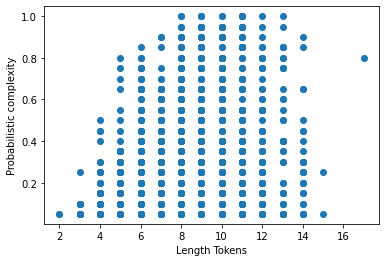

In [64]:
plt.scatter(length_tokens, prob)
plt.xlabel("Length Tokens")
plt.ylabel("Probabilistic complexity")
plt.show()

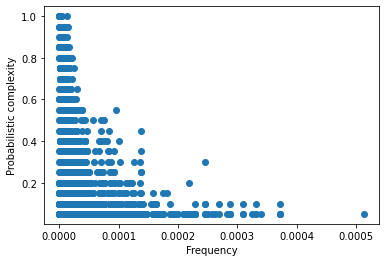

In [65]:
plt.scatter(frequency, prob)
plt.xlabel("Frequency")
plt.ylabel("Probabilistic complexity")
plt.show()

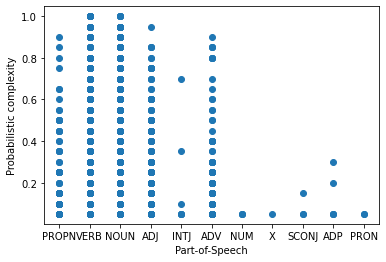

In [66]:
plt.scatter(pos, prob)
plt.xlabel("Part-of-Speech")
plt.ylabel("Probabilistic complexity")
plt.show()

<b>TASK 10</b>

In [167]:
# Implement four baselines for the task.
# Majority baseline: always assigns the majority class of the training data
# Random baseline: randomly assigns one of the classes. Make sure to set a random seed and average the accuracy over 100 runs.
# Length baseline: determines the class based on a length threshold
# Frequency baseline: determines the class based on a frequency threshold

from model.data_loader import DataLoader

# Each baseline returns predictions for the test data. The length and frequency baselines determine a threshold using the development data.

def majority_baseline(train_sentences, train_labels, testinput, testlabels):
    #find out about majority  class in training data
    predictions = []
    for instance in train_labels:   
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            predictions.append(i)
            
    majority_class = Counter(predictions).most_common()[0][0]

    #assign to each token (word) in test data the majority class as predicted value
    predictions = []
    for instance in testinput:
        tokens = instance.split(" ")
        for _ in tokens:
            predictions.append(majority_class)
    
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions




def random_baseline(train_sentences, train_labels, testinput, testlabels):
    predictions = []
    for instance in train_labels:   
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            predictions.append(i)
    
    distinct_labels = list(set(predictions))

    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    #assign random label to test output 100 times and average accuracy
    accuracies = []
    for i in range (100):
        random.seed(i)
        predictions = []
        for instance in testinput:
            tokens = instance.split(" ")
            for _ in tokens:
                predictions.append(random.choice(distinct_labels))
        
        #calculate accuracy after each iteration with new random seed
        correct_labeled = 0
        for i in range(len(predictions)):
            if predictions[i] == test_labels[i]:
                correct_labeled += 1

        random_accuracy = round(correct_labeled/len(predictions), 2)
        accuracies.append(random_accuracy)
    
    accuracy = round(sum(accuracies)/len(accuracies), 2)
    return accuracy, predictions   



def length_baseline(testinput, testlabels, length_threshold):  
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)
    
    predictions = []
    for sentence in testinput:
        tokens = sentence.split(" ")
        for token in tokens:
            if len(token) >= length_threshold:
                predictions.append('C')
            else: 
                predictions.append('N')

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions  



def frequency_baseline(testinput, testlabels, frequency_threshold):
    test_labels = []
    for instance in testlabels:
        tokens = instance.split(" ")
        for i in tokens:         
            if i == 'N\n':
                i = 'N'
            elif i == 'C\n':
                i = 'C'
            test_labels.append(i)

    predictions = []
    for sentence in testinput:
        tokens = sentence.split(" ")
        for token in tokens:
            if zipf_frequency(token, 'en') <= frequency_threshold:
                predictions.append('C')
            else: 
                predictions.append('N')

    #calculate accuracy
    correct_labeled = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            correct_labeled += 1

    accuracy = round(correct_labeled/len(predictions), 2)
    return accuracy, predictions  

if __name__ == '__main__':
    dir_path = "C:/Users/mpete/OneDrive/Desktop/Uni/Master_DBI/Period_5/NLP/Assignments/Assignment_1/intro2nlp_assignment1_code/"
    train_path = dir_path + "data/preprocessed/train/"
    dev_path = dir_path + "data/preprocessed/val/"          #changed from "/dev/" to "/val/" because there exists no "dev" folder
    test_path = dir_path + "data/preprocessed/test/"

    # Note: this loads all instances into memory. If you work with bigger files in the future, use an iterator instead.

    with open(train_path + "sentences.txt") as sent_file:
        train_sentences = sent_file.readlines()

    with open(train_path + "labels.txt") as label_file:
        train_labels = label_file.readlines()

    with open(dev_path + "sentences.txt") as dev_file:
        dev_sentences = dev_file.readlines()

    with open(dev_path + "labels.txt") as dev_label_file:       #changed from "train_path" to "dev_path"
        dev_labels = dev_label_file.readlines()

    with open(test_path + "sentences.txt") as testfile:
        testinput = testfile.readlines()

    with open(test_path + "labels.txt") as test_label_file:
        testlabels = test_label_file.readlines()
        
    length_threshold = 8   #accuracy best at threshold 8         
    frequency_threshold = 4.52  #accuracy best at zipf-frequency-threshold 4.52
    majority_accuracy, majority_predictions = majority_baseline(train_sentences, train_labels, testinput, testlabels)
    random_accuracy, random_predictions = random_baseline(train_sentences, train_labels, dev_sentences, dev_labels)
    length_accuracy, length_predictions = length_baseline(testinput, testlabels, length_threshold)
    frequency_accuracy, frequency_predictions = frequency_baseline(testinput, testlabels, frequency_threshold)
    print(majority_accuracy)
    print(random_accuracy)
    print(length_accuracy)
    print(frequency_accuracy)




0.8
0.5
0.87
0.76
